In [37]:
#! pip install pandas-datareader
#! pip install pmdarima
#! pip install plotly
#! pip install dash-bootstrap-components
#! pip install sklearn
import numpy as np
from pandas_datareader import DataReader # pip install pandas-datareader
from pandas_datareader import data
from datetime import datetime
from pmdarima.arima import *
from pmdarima import preprocessing
from scipy import stats
from scipy.stats import skew
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from statsmodels import api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

import pandas as pd
import pmdarima as pm
import plotly.graph_objects as go
import plotly.express as px
from plotly.tools import mpl_to_plotly 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [23]:
hs_df = pd.read_csv('dataset1.csv') #heuston station
ph_df = pd.read_csv('dataset2.csv') #portobello harbour

In [24]:
min_10 = 2 #2 x 5 minute samples = 10 minutes
min_30 = 6 #6 x 5 minute samples = 30 minutes
hour_1 = min_30 * 2
day_1 = min_30*24*2 #1 day worth of 5 min samples

week_1 = day_1*7 #1 week worth of 5 min samples

pred_intervals = [min_10, min_30, hour_1]

In [25]:
hs_vis = px.scatter(title="s")
hs_vis.update_layout(
    title="Available Bikes over Time",
    xaxis_title="Available Bikes",
    yaxis_title="Time",
    legend_title="Legend",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
hs_vis.add_trace(
    go.Scatter(name='Heuston Station',
           x=hs_df['TIME'],
           y=hs_df['AVAILABLE BIKES']))
hs_vis.add_trace(
    go.Scatter(name='Portobello Harbour',
           x=ph_df['TIME'],
           y=ph_df['AVAILABLE BIKES']))
hs_vis.show()

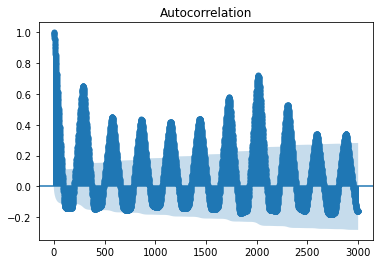

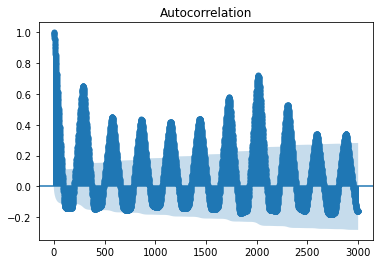

In [26]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(hs_df['AVAILABLE BIKES'].values, lags=3000)
#pyplot.show()

In [27]:
import datetime as dt
from sklearn.model_selection import train_test_split
X = pd.to_datetime(hs_df['TIME'])
temp = X
X = X.map(dt.datetime.toordinal)
X = X.to_frame()

y = hs_df['AVAILABLE BIKES'].values
y = y.reshape(-1,1)



In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.61, shuffle = False)

# temp_y = [y_train[-min_10], y_train[-min_30], y_test[min_30], y_test[min_30*2]]

# print(*temp_y)

In [29]:
# define model
model = Ridge(alpha=1.0)

from numpy import array

#Predicting 30 minutes from now

i = week_1
j = 0
rows = int (X_train.size - week_1)

X_list = [[0]*3]*rows
y_list = []
# X_list[j] = [X_train.TIME.iloc[i], X_train.TIME.iloc[i-min_30], X_train.TIME.iloc[i-day_1+min_30], X_train.TIME.iloc[i-week_1+min_30]]

#create feature vector of sliding 5 min samples
while i < X_train.size:
    X_list[j] = [y_train[i-2],y_train[i-min_30], y_train[i-day_1+min_30], y_train[i-week_1+min_30]]
    y_list.append(y_train[i])
    i+= 1
    j+= 1
a = array(X_list)
a  = a[:, :, 0]
# Dimensions: [m, n, 3]
print(a.shape)
print(len(y_list))
# fit model
temp = [y_train[-2],y_train[-min_30], y_train[-day_1+min_30], y_train[-week_1+min_30]]
temp = np.array(temp).reshape(1, -1)

model.fit(a,y_list)

# # make a prediction
yhat = model.predict(temp)
#yhat = yhat.tolist()
print("Currently ", y_train[-1], " bikes")
print("Predicting ", yhat[0], " bikes in 30 minutes")
print("Actually ", y_test[min_30], " bikes in 30 minutes")


(5928, 4)
5928
Currently  [34]  bikes
Predicting  [32.90030658]  bikes in 30 minutes
Actually  [13]  bikes in 30 minutes


In [ ]:
!conda install tensorflow
!conda install keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.61, shuffle = False)

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - tensorflow -> python[version='2.7.*|3.7.*|3.6.*|3.5.*']

Your python: python=3.8

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
cha

In [1]:
testPredict = model.predict(X_test)
print(testPredict)
print(y_test)

NameError: name 'model' is not defined

In [81]:
test_size = 0.01
y_preds10 = []
y_actuals10 = []
y_preds30 = []
y_actuals30 = []
y_preds60 = []
y_actuals60 = []
while test_size < 0.8:
    print ("test_size: ", test_size)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= test_size, shuffle = False)



    # define model
    model = Ridge(alpha=1.0)

    from numpy import array


    i = week_1
    j = 0
    rows = int (X_train.size - week_1)

    X_list = [[0]*4]*rows
    y_list = []
    # X_list[j] = [X_train.TIME.iloc[i], X_train.TIME.iloc[i-min_30], X_train.TIME.iloc[i-day_1+min_30], X_train.TIME.iloc[i-week_1+min_30]]

    #create feature vector of sliding 5 min samples
    while i < y_train.size:
        X_list[j] = [y_train[i-min_10],y_train[i-min_10*2], y_train[i-hour_1*8], y_train[i-day_1+min_10], y_train[i-week_1+min_10]]
        y_list.append(y_train[i])
        i+= 1
        j+= 1
    X_list = array(X_list)
    X_list  = X_list[:, :, 0]
    # Dimensions: [m, n, 3]
    print(X_list.shape)

    i = 0

    #X_list = X_list.tolist()

    #X_train = X_train.values.tolist()
    #print("X_train", X_train)
    y_train = y_train.tolist()
    print("y: ", y_train)
    while i < 6:
    # fit model
        temp = [y_list[-min_10],y_list[-min_10*2], y_list[-hour_1*8], y_list[-day_1+min_10], y_list[-week_1+min_10]]
        #temp = np.array(temp).reshape(1, -1)

        model.fit(X_list,y_list)

        # # make a prediction
        yhat = model.predict(temp)
        yhat = int(yhat[0])
#         print("Currently ", y_list[-1], " bikes")
#         print("Predicting ", yhat, " bikes in 10 minutes")
#         print("Actually ", y_test[i], " bikes in 10 minutes")
        if i == 0:
            y_preds10.append(yhat)
            y_actuals10.append(y_test[i][0])
        elif i == 2:
            y_preds30.append(yhat)
            y_actuals30.append(y_test[i][0])
        elif i == 5:
            y_preds60.append(yhat)
            y_actuals60.append(y_test[i][0])
        #print(X_list.shape)
        #X_list = np.append(X_list, [y_train[i-min_10],y_train[i-min_10*2], y_train[i-day_1+min_10], y_train[i-week_1+min_10]], axis=0)
        #X_list = np.vstack([X_list,[y_train[i-min_10],y_train[i-min_10*2], y_train[i-day_1+min_10], y_train[i-week_1+min_10]]])
        #print(X_list.shape)
        #y_train = np.delete(y_test,0)


        X_list.append([y_train[-min_10],y_train[-min_10*2], y_train[-hour_1*8], y_train[-day_1+min_10], y_train[-week_1+min_10]])
        y_list.append(yhat)
        #y_train = np.delete(y_train,0)
        i += 1
    test_size += 0.01
    #mean_squared_error(y_actuals, y_preds)  


test_size:  0.01
(18150, 5)
y:  [[39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [39], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [38], [

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 1)

In [64]:
print(mean_squared_error(y_actuals10, y_preds10))  
print(mean_squared_error(y_actuals30, y_preds30)) 
print(mean_squared_error(y_actuals60, y_preds60))

print(y_actuals10)
print(y_preds10)

4.620253164556962
4.7974683544303796
21.645569620253166
[16, 8, 11, 12, 11, 12, 13, 20, 22, 9, 7, 14, 9, 12, 14, 13, 22, 30, 8, 14, 10, 11, 35, 34, 17, 20, 9, 0, 30, 37, 0, 29, 32, 33, 32, 29, 40, 0, 40, 40, 0, 40, 37, 40, 40, 40, 40, 0, 40, 40, 0, 18, 30, 32, 33, 33, 30, 0, 40, 31, 34, 0, 38, 39, 40, 40, 40, 0, 0, 40, 40, 0, 39, 39, 40, 12, 40, 40, 0]
[18, 8, 11, 12, 11, 12, 13, 21, 21, 9, 7, 14, 9, 12, 14, 13, 21, 29, 8, 14, 9, 12, 34, 33, 17, 20, 9, 0, 30, 36, 0, 29, 32, 33, 32, 29, 39, 0, 40, 39, 0, 40, 36, 39, 38, 40, 39, 0, 40, 39, 0, 12, 30, 32, 32, 33, 30, 0, 40, 31, 33, 0, 37, 38, 38, 40, 39, 0, 0, 40, 39, 0, 38, 38, 38, 29, 40, 39, 0]


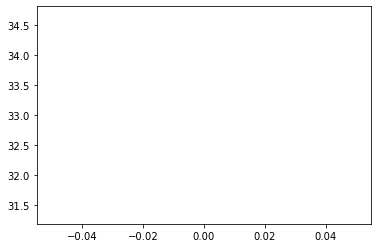

ValueError: 
    Invalid value of type 'builtins.int' received for the 'y' property of scatter
        Received value: 33

    The 'y' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

In [11]:
# # summarize prediction
#print('Predicted: %.3f' % yhat)
plt.plot(yhat)
#plt.plot(y)
plt.show()
hs_vis = px.scatter(title="s")
hs_vis.update_layout(
    title="Available Bikes over Time",
    xaxis_title="Available Bikes",
    yaxis_title="Time",
    legend_title="Legend",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
# hs_vis.add_trace(
#     go.Scatter(name='Heuston Station',
#            x=hs_df['TIME'],
#            y=hs_df['AVAILABLE BIKES']))
hs_vis.add_trace(
    go.Scatter(name='Portobello Harbour',
           x=temp,
           y=yhat))
hs_vis.show()